# Getting Started with Images
This notebook will help you take your first steps in learning Image Processing and Computer Vision using OpenCV. You will learn some important lessons using some simple examples. In this notebook, you will learn the following:

1. Reading an image
2. Check image attributes like datatype and shape
3. Matrix representation of an image in Numpy
4. Color Images and splitting/merging image channels
5. Displaying images using matplotlib
6. Saving images

## Install libraries

**IMPORTANT!!!** Make sure you are using the correct environment on your notebook and have installed the opencv library.
You can do this in anaconda with the following commands.
1. To create the virtual environment:
    conda create --name opencv-env 
2. To activate the virtual environment:
    conda activate opencv-env 
3. To install the opencv library:
    conda install -c conda-forge opencv

Then we need to install the libraries with the following command:

In [3]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Import the libraries

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

#this inline specification is to display directly images in the notebook
%matplotlib inline 

## Display Image Directly
We will use the following as our sample images. We will use the ipython image function to load and display the image.

In [5]:
# Display 18x18 pixel image.
Image(filename="datos/sonic_18x18.jpg")

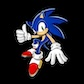

In [6]:
# Display 84x84 pixel image.
Image(filename="datos/sonic_84x84.jpg")

## Reading images using OpenCV

OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images, color images or you can also load images with Alpha channel. It uses the **`cv2.imread()`** function which has the following syntax:

**Function Syntax**

``` python
retval = cv2.imread( filename[, flags] )
```

`retval`: Is the image if it is successfully loaded. Otherwise it is `None`. This may happen if the filename is wrong or the file is corrupt.

The function has **1 required input argument** and one optional flag:


1. `filename`: This can be an **absolute** or **relative** path. This is a **mandatory argument**.

2. `Flags`:    These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an **optional argument** with a default value of `cv2.IMREAD_COLOR` or `1` which loads the image as a color image.

Before we proceed with some examples, let's also have a look at some of the `flags` available.

**Flags**
1. **`cv2.IMREAD_GRAYSCALE`** or **`0`**: Loads image in grayscale mode
2. **`cv2.IMREAD_COLOR`** or **`1`**: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. **`cv2.IMREAD_UNCHANGED`** or **`-1`**: Loads image as such including alpha channel.


**OpenCV Documentation**

1. **`Imread`**:  <a href="https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56" target="_blank">Documentation link</a>

2. **`ImreadModes`**: <a href="https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80" target="_blank">Documentation link</a>


## Read image in grayscale

In [7]:
# Read image as gray scale.
cb_img = cv2.imread("datos/sonic_18x18.jpg", 0)

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0,255]
print(cb_img)
# print shape of the numpy array
print(cb_img.shape)
Image(filename="datos/sonic_18x18.jpg")

[[  0   4   0   0   1   1   0   2  15   4   0   3   0   2   0   1   0   0]
 [  4   0   0   1   1   0   3   7   3  10  67  54  10  10   1   0   0   0]
 [  0   1   1   0   0  14   6   4  81 102  69  47   3   0   2   4   0   0]
 [  1   0   4   0   5   0   2  58 130 109  20  66  88  73  18   2   0   0]
 [  0   2   0  25   4  15  59  64 112 131  33  58  50  78  50   1   1   0]
 [  0   2  26   0  80 158  57  20 201 216  38  55  62   0   3   3   1   1]
 [  2  28   0 117 213 196   3  97 210 216  98  25  85  75   0   7   1   1]
 [  0  34   3 146 232 219 191 141 163 160 150  70  15  84  23   0   1   1]
 [  0  21   0  87 205 171 142 102  74 116 124 157   3   5  24   0   0   2]
 [  0   1   2   2  64   0   4 167 138  14   5 207 194  24   0  21   1   1]
 [  0   3   0  15   0  16 178 192  65  39  33 225 242 115   2  35   3   0]
 [  1   0   9   1  64  94 142 186 173  87 141 243 242 203   0   1  12   0]
 [  0   0   3   0  51  39  97 238 212 103 201 212 172 237 138   0  21   4]
 [  0   3   0   4  23   4

In a grayscale image, each pixel’s value represents its light intensity or luminosity. This value is derived from the original image’s color channels (red, green, and blue) using a formula that accounts for how the human eye perceives brightness.
- In the given image, the eyes and gloves appear white or very bright, indicating that they have high values in the red, green, and blue channels.
- Conversely, areas that are blue or black in the original image, which have lower RGB values, appear darker in the grayscale version.

In this case, the resulting array has the same dimensions as the image.

## Read Image in Color


In [8]:
# Read image in color.
cb_img = cv2.imread("datos/sonic_18x18.jpg", 1)

# print the first pixel of the image thats why we use [0,0]
print(cb_img[0,0])
# print shape of the numpy array
print(cb_img.shape)
Image(filename="datos/sonic_18x18.jpg")

[0 3 0]
(18, 18, 3)


With the IMREAD_COLOR flag, we can see that the resulting NumPy array is three times larger than the grayscale array because it includes RGB values.

## Read Image in color with alpha channel


In [9]:
# Read image in color.
cb_img = cv2.imread("datos/dices_18x18.png", -1)

# print the first pixel of the image thats why we use [0,0]
print(cb_img[0,0])
# print shape of the numpy array
print(cb_img.shape)
Image(filename="datos/dices_18x18.png")

[0 0 0 0]
(18, 18, 4)


With the IMREAD_UNCHANGED we can see that the NumPy array has another dimension, the alpha channel.

## Display Image attributes

With .shape and .dtype attributes we can see the shape and type of the image.

In [10]:
# print the size  of image
print("Image size (H, W) is:", cb_img.shape)

# print data-type of image
print("Data type of image is:", cb_img.dtype)

Image size (H, W) is: (18, 18, 4)
Data type of image is: uint8


## Display Images in grayscale with Matplotlib

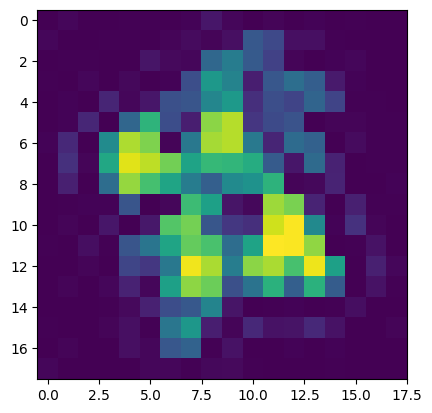

In [11]:
# Read image as gray scale.
cb_img_for_plt = cv2.imread("datos/sonic_18x18.jpg", 0)
# Display image.
plt.imshow(cb_img_for_plt)

**Why is not in grayscale?**

In this case the imshow method of matplotlib uses different color maps and it's possible that the gray scale color map is not set.

In order to use the gray scale color map we have to set the attribute cmap to "gray"

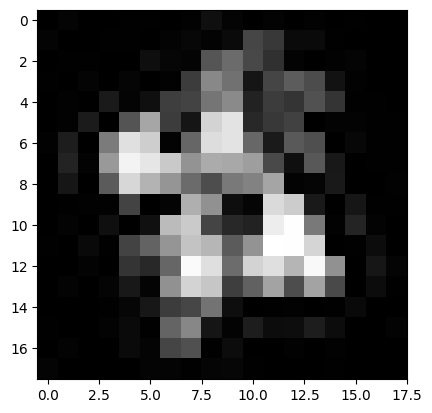

In [12]:
# Set color map to gray scale for proper rendering.
plt.imshow(cb_img_for_plt, cmap="gray")

### Another Example

[[  0   0   0   0   0   0   0   0   0 155 178 147 147   0   0   0   0   0]
 [  0   0   0   0   0 255 255   0 255   0   0   0   0 147   0   0   0   0]
 [  0   0 255 255 221   0   0 151   0 146 155 131   0   0 147   0   0   0]
 [  0   0   0   0   0 236 207   0 147 202 221 170 112   0   0   0   0   0]
 [255   0 242 242 249 245 192 110 115 143 186 156 127 103   0 110   0   0]
 [255   0 232 255 255 226 143 103 147 147  98 111 120 101   0 147   0   0]
 [255   0   0 200 191 136 126 205 228 222 208 139 101 101 105   0  74   0]
 [  0   0 178   0   0 128 147 167 232 203 178 181  98 105 112   0  96   0]
 [  0   0   0 169   0 109 145 164 151 123  90 164 106 173 198   0 178   0]
 [  0   0   0   0 151   0 118 170 149  82 144 160 135 182   0  74   0   0]
 [  0   0   0   0 128   0 175 115 152 132 126 102   0   0   0   0   0   0]
 [  0   0   0   0  95   0 157 115 118 137 106 142 129 119   0 147   0   0]
 [  0   0   0 114   0 122 124 118 127 148  93 133 148 110   0 110   0   0]
 [  0   0   0 107   0 115

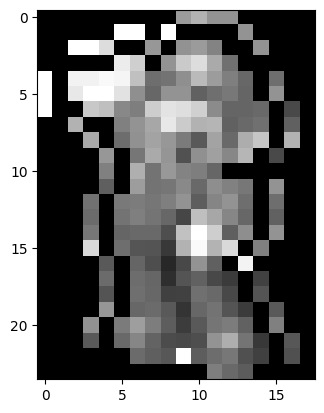

In [13]:
# Read image as gray scale.
cb_img_for_plt_other = cv2.imread("datos/mario_18x24.png", 0)
# Display image.
plt.imshow(cb_img_for_plt_other, cmap="gray")
print(cb_img_for_plt_other)
Image(filename="datos/mario_18x24.png")

## Display Images in color with Matplotlib

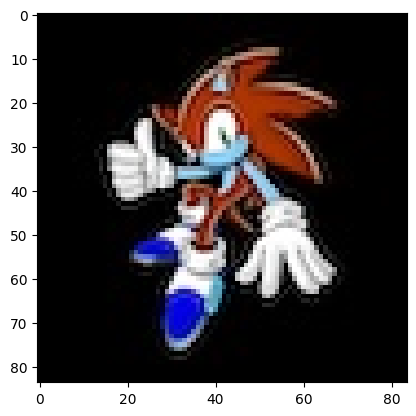

In [14]:
# Read image as gray scale.
cb_img_for_plt_color = cv2.imread("datos/sonic_84x84.jpg", -1)
# Display image.
plt.imshow(cb_img_for_plt_color)

**Why do the colors not correspond to the ones in the image?**

The reason is that OpenCV stores image in BGR format and the matplotlib library expects the image in RGB format.

In order to display correctly the image we have to reverse the channels in the correct way.

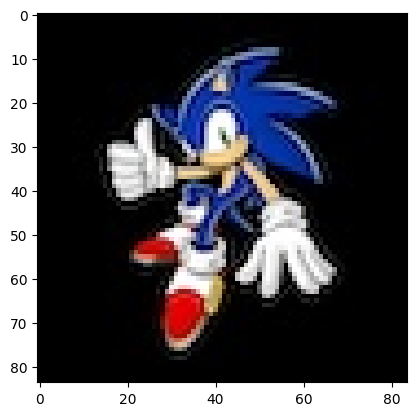

In [15]:
cb_img_for_plt_color_reversed = cb_img_for_plt_color[:, :, ::-1]
plt.imshow(cb_img_for_plt_color_reversed)

## Splitting and merging color channels

**cv2.split()** Divides a multi-channel array into several single-channel arrays.

**cv2.merge()** Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

Text(0.5, 1.0, 'Merged Output')

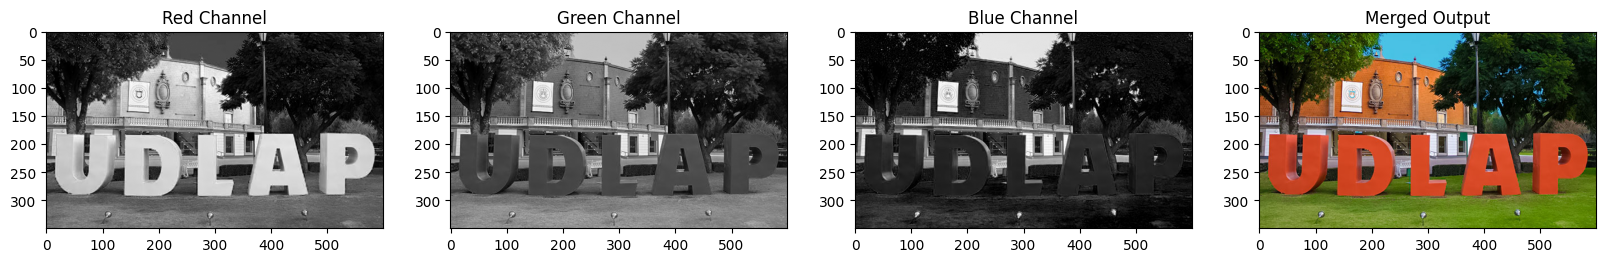

In [ ]:
# Split the image into the B,G,R components
img_NZ_bgr = cv2.imread("datos/udlap.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_NZ_bgr)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel")

# Merge the individual channels into a RGB image
imgMerged = cv2.merge((r, g, b))
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged)
plt.title("Merged Output")

## Converting to different Color Spaces


**`cv2.cvtColor()`** Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

``` python
dst = cv2.cvtColor( src, code )
```

`dst`: Is the output image of the same size and depth as `src`.

The function has **2 required arguments**:

1. `src` input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.

2. `code` color space conversion code.

### Conversion codes

There are a lot of conversion codes but the principal are:
``` python
cv2.COLOR_BGR2RGB
``` 
Converts an image from BGR to RGB.
``` python
cv2.COLOR_BGR2GRAY
``` 
Converts an image from BGR to grayscale.
``` python
cv2.COLOR_BGR2HSV
```
Converts an image from BGR to HSV.
``` python
cv2.COLOR_BGR2LAB
```
Converts an image from BGR to LAB.
``` python
cv2.COLOR_RGB2BGR
```
Converts an image from RGB to BGR

### Convert from BGR to RGB

To do this we use the code cv2.COLOR_BGR2RGB explained before

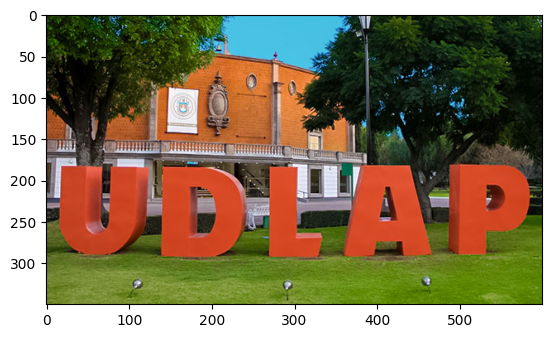

In [22]:
# Change color space BGR to RGB
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)

### Changing to HSV color space

The HSV color space represents colors using three components:

Hue: The color type, measured in degrees (0°–360°).

Saturation: The color's purity, ranging from 0 (gray) to 255 (fully saturated).

Value: The brightness, ranging from 0 (dark) to 255 (brightest).

The HSV color space is important because it separates color (Hue) from brightness (Value) and saturation (Saturation), making it ideal for tasks like color segmentation.

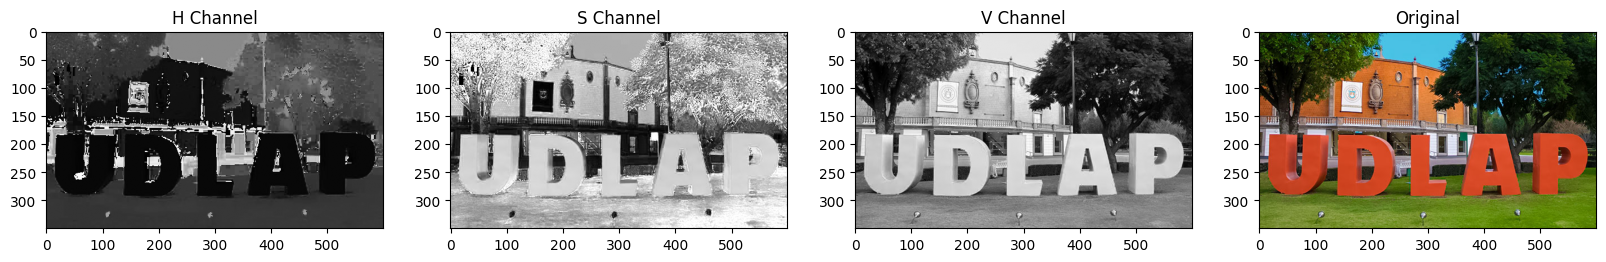

In [ ]:
# We use the COLOR_BGR2HSV code to convert the image from BGR to HSV color space
img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)

# Split the image into the B,G,R components
h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");